In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
import sys
# Determine the absolute path to your training data folder.
project_root = os.path.abspath(
    os.path.join(os.path.dirname(__file__) if '__file__' in globals() else os.getcwd(), '..')
)

# Insert project_root to sys.path if needed.
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Build the path to the data folder (assuming your data folder is directly under the project root)
data_dir = os.path.join(project_root, 'data')
data_small_dir = os.path.join(project_root, 'data_small')
data_small_dir = os.path.join(project_root, 'synth_data')

print("Project root:", project_root)
print("Data directory:", data_dir)

from models import get_model, mbconv_base,train_model

from keras.models import Model
from keras.preprocessing import image_dataset_from_directory
import tensorflow as tf

Project root: /home/phigep/fh/face-mask-detection
Data directory: /home/phigep/fh/face-mask-detection/data


In [3]:
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')
test_small_dir = os.path.join(data_small_dir, 'test')
test_synth_dir = os.path.join(data_small_dir, 'test')

In [4]:
BATCH_SIZE = 32
ORIGINAL_IMAGE_SIZE = (None, None)  # Allow variable sizes
TARGET_IMAGE_SIZE = (224, 224)       # EfficientNetV2's expected input size
EPOCHS = 25
AUTOTUNE = tf.data.AUTOTUNE
temperature = 0.15

In [5]:
from preprocessing import get_augmented_dataset
train_dataset = get_augmented_dataset(train_dir,batch_size=32)
validation_dataset = get_augmented_dataset(val_dir,batch_size=32,shuffle=True)
test_dataset = get_augmented_dataset(test_dir,batch_size=32,shuffle=False)
test_small_dataset = get_augmented_dataset(test_small_dir,batch_size=1,shuffle=False)




Found 73230 files belonging to 2 classes.
Found 36545 files belonging to 2 classes.
Found 19343 files belonging to 2 classes.
Found 399 files belonging to 2 classes.


In [7]:
from models import get_fcn_model,get_supervised_contrastive_loss
fcn_modelmbconv = get_fcn_model(mbconv_base,input_dim=(224,224,3), resize_dim=(224,224,3), classes=2)


In [8]:
test_synth_dataset_shuffled = get_augmented_dataset(test_synth_dir,batch_size=4,shuffle=True)
test_small_dataset_shuffled = get_augmented_dataset(test_small_dir,batch_size=1,shuffle=True)

Found 399 files belonging to 2 classes.
Found 399 files belonging to 2 classes.


In [9]:
from keras.optimizers import AdamW
optimizer = AdamW(learning_rate=5e-5)

In [10]:

fcn_modelmbconv.compile(
    optimizer=optimizer,
    loss=get_supervised_contrastive_loss(0.10)
)


In [12]:
import os
from models import get_fcn_model,get_supervised_contrastive_loss
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True,
    mode="min"
)


fcn_modelb = fcn_modelmbconv.fit(train_dataset,callbacks=[early_stopping],epochs=25)

Epoch 1/25


I0000 00:00:1737972585.918518  532442 service.cc:148] XLA service 0x709ec4002480 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737972585.918545  532442 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-01-27 11:09:46.194293: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737972587.636381  532442 cuda_dnn.cc:529] Loaded cuDNN version 90700
2025-01-27 11:09:48.769738: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8933', 24 bytes spill stores, 24 bytes spill loads

2025-01-27 11:09:48.783437: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8933', 60 bytes

   5/2289 ━━━━━━━━━━━━━━━━━━━━ 1:27 38ms/step - loss: 3.4485 

I0000 00:00:1737972597.466430  532442 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2289/2289 ━━━━━━━━━━━━━━━━━━━━ 140s 52ms/step - loss: 3.0430
Epoch 2/25
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 112s 49ms/step - loss: 2.8869
Epoch 3/25
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 112s 48ms/step - loss: 2.8605
Epoch 4/25
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 112s 49ms/step - loss: 2.8466
Epoch 5/25
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 109s 47ms/step - loss: 2.8361
Epoch 6/25
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 110s 48ms/step - loss: 2.8253
Epoch 7/25
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 116s 50ms/step - loss: 2.8212
Epoch 8/25
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 118s 51ms/step - loss: 2.8149
Epoch 9/25
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 120s 52ms/step - loss: 2.8097
Epoch 10/25
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 115s 50ms/step - loss: 2.8127
Epoch 11/25
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 119s 52ms/step - loss: 2.8067
Epoch 12/25
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 125s 54ms/step - loss: 2.8016
Epoch 13/25
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 114s 49ms/step - loss: 2.7983
Epoch 14/25
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 113s 49ms/step - loss: 2.799

In [15]:
checkpoint_path = "./checkpoints/fcn_mbconv_deeper.weights.h5"
fcn_modelmbconv.save_weights(checkpoint_path)

In [16]:
checkpoint_path = "./checkpoints/fcn_mbconv_deeper.weights.h5"
fcn_modelmbconv.load_weights(checkpoint_path)

In [17]:
from models import HybridModel
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,matthews_corrcoef, confusion_matrix
hybrid_mbconv_model = HybridModel(fcn = fcn_modelmbconv,clf= XGBClassifier(),train_dataset=train_dataset,validation_dataset=validation_dataset,test_dataset=test_dataset)


hybrid_mbconv_model.clf.fit(
    hybrid_mbconv_model.X_train, hybrid_mbconv_model.y_train,
    eval_set=[ (hybrid_mbconv_model.X_val, hybrid_mbconv_model.y_val)],           # or another metric suited to your problem         # stops training if validation metric doesn't improve for 10 rounds
    verbose=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━

2025-01-27 12:01:25.512833: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━

2025-01-27 12:03:05.775169: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [18]:
hybrid_mbconv_model.clf.save_model("./checkpoints/xgboost_mbconv_deeper.bin")

/home/phigep/fh/face-mask-detection/.venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:04:03] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [20]:
print("Model parameters:")
print(hybrid_mbconv_model.clf.get_params())
y_pred = hybrid_mbconv_model.clf.predict(hybrid_mbconv_model.X_test)
mcoeff = matthews_corrcoef(hybrid_mbconv_model.y_test, y_pred)
print("Mathew Coeff", mcoeff)
confusion_matrix(hybrid_mbconv_model.y_test,y_pred)

Model parameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Mathew Coeff 0.983655578043962


array([[10675,    94],
       [   62,  8497]])

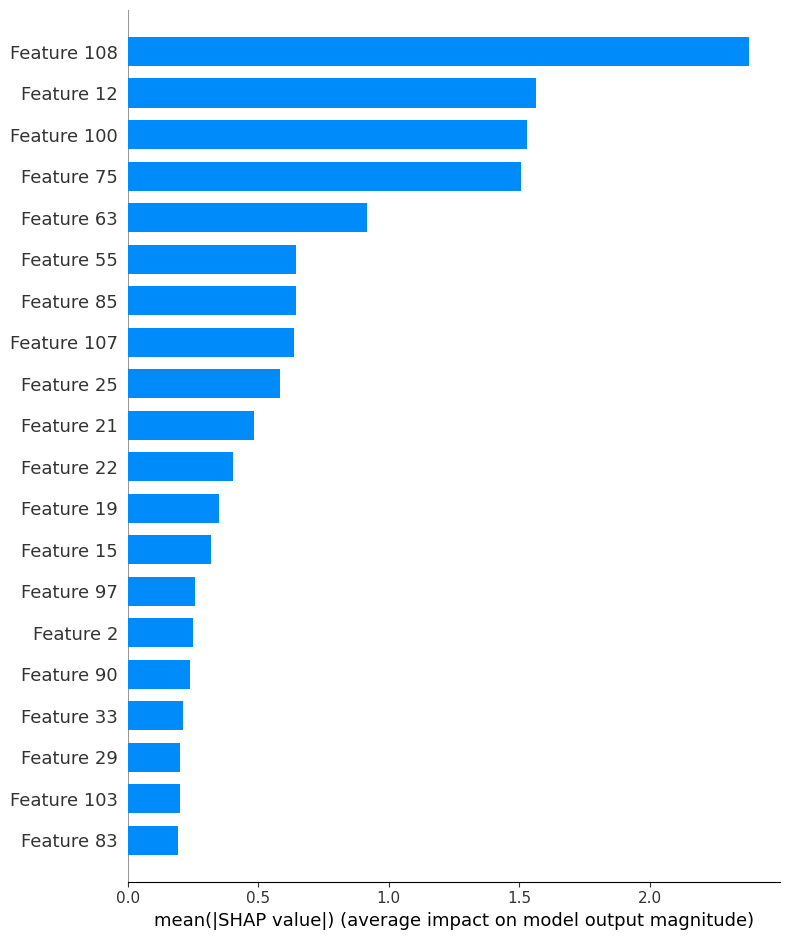

In [21]:
import shap
model = hybrid_mbconv_model.clf
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for your validation set (or use X_train as needed)
shap_values = explainer.shap_values(hybrid_mbconv_model.X_test)

# For binary classification, shap_values might be a list of two arrays,
# one for each class. Typically, we use the values for the positive class.
if isinstance(shap_values, list):
    # Use SHAP values for class 1, e.g. the "positive" class
    shap_values_to_plot = shap_values[1]
else:
    shap_values_to_plot = shap_values

# Generate a bar summary plot of the top 20 most important features
shap.summary_plot(shap_values_to_plot, hybrid_mbconv_model.X_test, plot_type="bar", max_display=20)

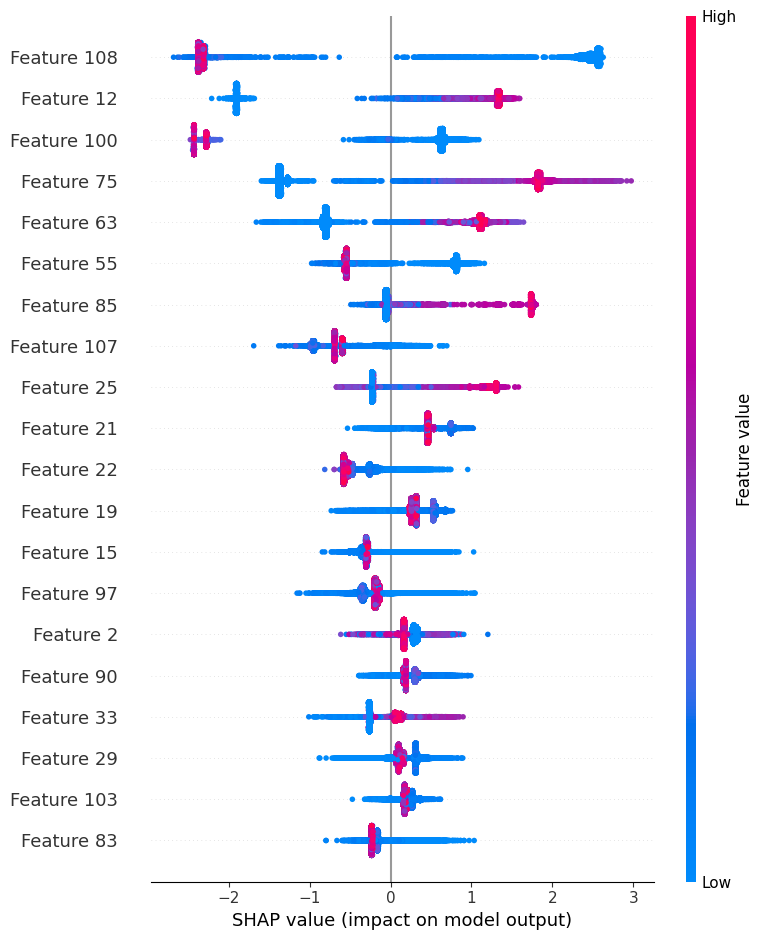

In [22]:
shap.initjs()
shap.summary_plot(shap_values, hybrid_mbconv_model.X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.         0.         0.21717168 0.31101057 0.         0.
  0.47202334 0.5946749  0.3331505  0.         0.375166   0.
  0.3023951  0.5512943  0.         0.55981284 0.         0.
  0.         0.48338994 0.         0.23687734 0.22863296 0.
  0.         0.4409238  0.         0.         0.         0.37346473
  0.         0.         0.         0.18908036 0.33639917 0.5002235
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.35025698 0.
  0.7697301  0.         0.         0.         0.         0.
  0.2909042  0.38739392 0.         0.         0.         0.
  0.5769944  0.         0.         0.25065285 0.6827157  0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.57267654 0.         0.
  0.         0.         0.         0.         0.         0.46861476
  0.         0.42150795 0.         0.56863034 0.         0.
  0.49731937 0.47654754 0.         0.  

2025-01-27 12:04:51.664170: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


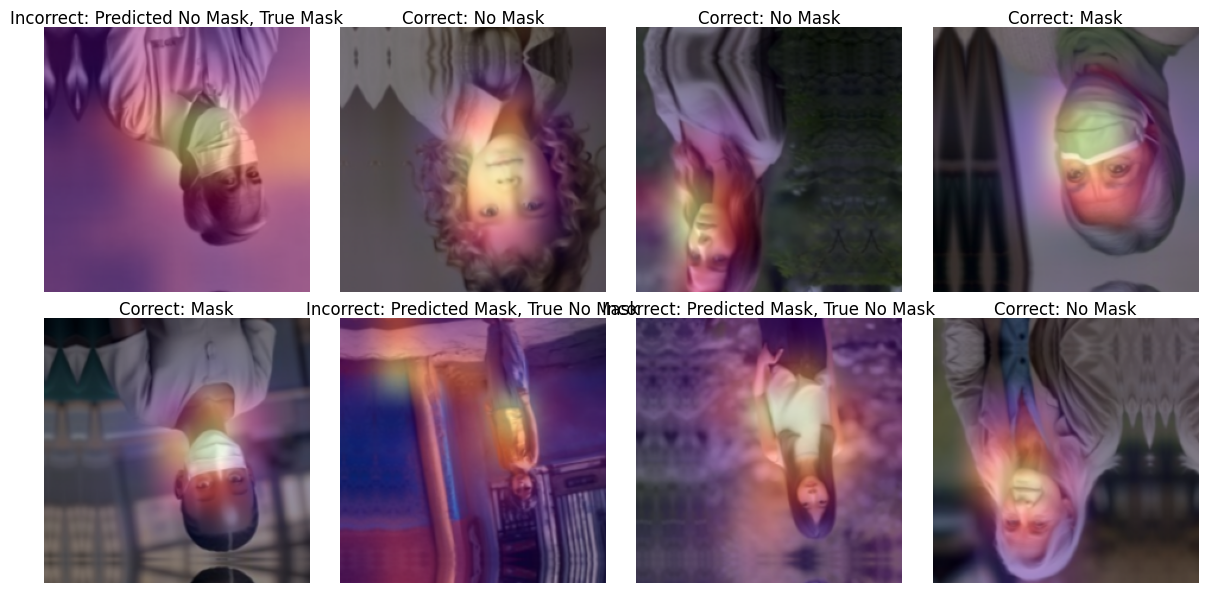

In [24]:
from eval import make_gradcam_heatmap, superimpose_gradcam,plot_images_grid
import matplotlib.pyplot as plt
import numpy as np
label_map = {0: "Mask", 1: "No Mask"}

captions = []
final_images=[]
for images, labels in test_small_dataset_shuffled.take(16):
    heatmap = make_gradcam_heatmap(model=fcn_modelmbconv,
                         last_conv_layer_name="functional_2",
                         img_array=images,
                         )
    final = superimpose_gradcam(heatmap=heatmap, img=images[0],alpha=1)
    final_images.append(final)
    ftrs = hybrid_mbconv_model.fcn.predict(images)
    print(ftrs)
    preds = hybrid_mbconv_model.clf.predict(ftrs)
    if preds[0] == np.argmax(labels,axis=1)[0]:
        caption = f"Correct: {label_map[preds[0]]}"
    else:
        caption = f"Incorrect: Predicted {label_map[preds[0]]}, True {label_map[np.argmax(labels,axis=1)[0]]}"
    
    captions.append(caption)
p=plot_images_grid(final_images,captions=captions)

In [19]:
import json
def count_nodes(tree):
    """Recursively count the number of nodes in a tree."""
    if 'children' not in tree:
        return 1
    return 1 + sum(count_nodes(child) for child in tree['children'])

def get_max_depth(tree, current_depth=0):
    """Recursively determine the maximum depth of a tree."""
    if 'children' not in tree:
        return current_depth
    return max(get_max_depth(child, current_depth + 1) for child in tree['children'])

booster = model.get_booster()

# Dump the model in JSON format for easier parsing
trees_json = booster.get_dump(dump_format='json')

# Iterate through each tree and extract details
for i, tree_str in enumerate(trees_json):
    tree = json.loads(tree_str)
    num_nodes = count_nodes(tree)
    max_depth = get_max_depth(tree)
    print(f"Tree {i + 1}:")
    print(f"  Number of Nodes: {num_nodes}")
    print(f"  Maximum Depth: {max_depth}\n")

Tree 1:
  Number of Nodes: 79
  Maximum Depth: 6

Tree 2:
  Number of Nodes: 67
  Maximum Depth: 6

Tree 3:
  Number of Nodes: 73
  Maximum Depth: 6

Tree 4:
  Number of Nodes: 65
  Maximum Depth: 6

Tree 5:
  Number of Nodes: 69
  Maximum Depth: 6

Tree 6:
  Number of Nodes: 59
  Maximum Depth: 6

Tree 7:
  Number of Nodes: 61
  Maximum Depth: 6

Tree 8:
  Number of Nodes: 67
  Maximum Depth: 6

Tree 9:
  Number of Nodes: 61
  Maximum Depth: 6

Tree 10:
  Number of Nodes: 61
  Maximum Depth: 6

Tree 11:
  Number of Nodes: 59
  Maximum Depth: 6

Tree 12:
  Number of Nodes: 39
  Maximum Depth: 6

Tree 13:
  Number of Nodes: 59
  Maximum Depth: 6

Tree 14:
  Number of Nodes: 55
  Maximum Depth: 6

Tree 15:
  Number of Nodes: 45
  Maximum Depth: 6

Tree 16:
  Number of Nodes: 39
  Maximum Depth: 6

Tree 17:
  Number of Nodes: 35
  Maximum Depth: 6

Tree 18:
  Number of Nodes: 31
  Maximum Depth: 6

Tree 19:
  Number of Nodes: 31
  Maximum Depth: 6

Tree 20:
  Number of Nodes: 19
  Maximum

In [20]:
booster = model.get_booster()
booster.save_model('xgb_model.bin')
file_size_bin = os.path.getsize('xgb_model.bin') / (1024 * 1024)  # Convert bytes to MB
print(f"Model size (Binary): {file_size_bin:.2f} MB")


Model size (Binary): 0.17 MB


/home/phigep/fh/face-mask-detection/.venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:49:50] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
